<a href="https://colab.research.google.com/github/art-python/MSDeakin/blob/SIG720-MachineLearning/SIG720_TaskP1_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1**
Load data from digitData2.csv file. The last column of each file presents the label and the rest of
the columns are features.
1. Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values.
2. Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the
previous problem. Report performances using appropriate evaluation metrics. Compare the
results.
3. Now repeat clustering using Kmeans for 50 times and report the average performance. Again,
compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if
any).
4. Apply DBSCAN on this dataset (digitData2.csv) and find the optimum "eps" and "min_samples"
value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or
differences that you have found between two solutions.

------------------------------------------------------

Let's begin with initial data loading part

To start with let's import all the important libraries from different modules.

In [1]:
#import important libraries
import pandas as pd               #import Pandas package
import numpy as np                #import Numpy package
import matplotlib.pyplot as plt   #import Matplotlib package
import seaborn as sns             #import Seaborn package
%matplotlib inline

Now, let's load data from google drive folder stored as a csv file.  

In [2]:
# Import the file from google drive, mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Load the dataset file and read the csv
folder_path = "/content/drive/MyDrive/MSDeakin/SIG720-MachineLearning/"
file_name = "digitData2.csv"

# Load the CSV file into a DataFrame
dataset = pd.DataFrame(pd.read_csv(folder_path + file_name))
df = dataset.copy()

Let's assign some column name for our ease and have a brief view of the dataset.

In [17]:
# Assign column names based on their column number (0-based indexing)
num_columns = len(df.columns)
column_names = [f'Col{i+1}' for i in range(num_columns)]

# Update the DataFrame with the assigned column names
df.columns = column_names

# Display the DataFrame
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col56,Col57,Col58,Col59,Col60,Col61,Col62,Col63,Col64,Col65
0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
1,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
2,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
3,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
4,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5.0


In [45]:
#check the shape of the dataset
print('The shape of the dataset is', df.shape)

The shape of the dataset is (1527, 65)


In [43]:
# Statistical Summary of df
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col56,Col57,Col58,Col59,Col60,Col61,Col62,Col63,Col64,Col65
count,1527.0,1527.000000,1527.00000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,...,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000
mean,0.0,0.298625,5.18664,11.747217,11.888016,5.913556,1.453176,0.140144,0.006549,2.004584,...,0.221349,0.000655,0.273739,5.544859,12.120498,12.047806,7.111984,2.259987,0.415193,4.482646
std,0.0,0.883750,4.76690,4.312531,4.275862,5.695563,3.444220,1.056097,0.102186,3.153455,...,1.014051,0.025591,0.890306,5.104715,4.381379,4.835533,5.961973,4.280452,1.999470,2.861972
min,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.00000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.00000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,7.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.00000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,13.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.00000,16.000000,16.000000,16.000000,16.000000,14.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


* The dataset has 64 features and one target variable which is 65th column and the features are in different range of values which means that we might need scaling to normalize this dataset across all the variables.

In [46]:
# Checking for duplicate values
df.duplicated().sum()

0

* There is no duplicate values in this dataset.

In [47]:
# Checking for missing values
df.isnull().sum()

Col1     0
Col2     0
Col3     0
Col4     0
Col5     0
        ..
Col61    0
Col62    0
Col63    0
Col64    0
Col65    0
Length: 65, dtype: int64

* There is no missing values present in this dataset.

Now, as recommended extract the target variable from the features variables.

In [72]:
# Extract features (all columns except the last one)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

**Scale the dataset**

Now, let's proceed with scaling the data in order to normalise it. Clustering algorithms are a type of algorithm that rely on distances between data points. It is important to note that all distance-based algorithms are influenced by the scale of the variables. Hence, it is necessary to perform data scaling prior to implementing the clustering algorithm.

In [73]:
# Import MinMaxscaler to scale the data between -1 to 1 for all the features
from sklearn.preprocessing import MinMaxScaler

# Scaling the data before clustering
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Creating a dataframe of the scaled data
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [74]:
# verify the scaling
X_scaled.describe().round(2)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col55,Col56,Col57,Col58,Col59,Col60,Col61,Col62,Col63,Col64
count,1527.0,1527.00,1527.00,1527.00,1527.00,1527.00,1527.00,1527.00,1527.00,1527.00,...,1527.00,1527.00,1527.00,1527.00,1527.00,1527.00,1527.00,1527.00,1527.00,1527.00
mean,0.0,0.04,0.32,0.73,0.74,0.37,0.09,0.01,0.00,0.13,...,0.24,0.02,0.00,0.03,0.35,0.76,0.75,0.44,0.14,0.03
std,0.0,0.11,0.30,0.27,0.27,0.36,0.22,0.08,0.05,0.20,...,0.31,0.08,0.03,0.10,0.32,0.27,0.30,0.37,0.27,0.12
min,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.0,0.00,0.06,0.62,0.62,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.06,0.69,0.62,0.00,0.00,0.00
50%,0.0,0.00,0.25,0.81,0.81,0.25,0.00,0.00,0.00,0.00,...,0.06,0.00,0.00,0.00,0.25,0.81,0.88,0.44,0.00,0.00
75%,0.0,0.00,0.56,0.94,0.94,0.69,0.00,0.00,0.00,0.19,...,0.44,0.00,0.00,0.00,0.62,1.00,1.00,0.81,0.12,0.00
max,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [75]:
#convert the X scaled into new X
X = X_scaled.copy()

Now, let's start our task with Q1.1

### **1.1. Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values.**

In [76]:
# Import libraries required for the task such as Kmean 7 silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Define a range of k values to try
k_values = range(2, 63)
# we can adjust the range as needed but for our case we are keeping it till max. possible or 64 features.

# Initialize lists to store the Silhouette Coefficients for each k value
silhouette_scores = []

In [ ]:
# Iterate over each k value
for k in k_values:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    # Calculate the Silhouette Coefficient
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

Let's print the Silhouette scores

In [78]:
# Print the silhouette score rounded off to 3 digits
print("Silhouette Score:", np.round(silhouette_scores, decimals=3))

Silhouette Score: [0.12  0.128 0.13  0.145 0.156 0.17  0.181 0.194 0.187 0.187 0.186 0.189
 0.186 0.18  0.181 0.182 0.184 0.175 0.166 0.168 0.171 0.187 0.164 0.167
 0.153 0.152 0.15  0.149 0.14  0.145 0.155 0.167 0.141 0.148 0.146 0.145
 0.145 0.144 0.142 0.143 0.144 0.147 0.141 0.14  0.142 0.143 0.144 0.143
 0.142 0.137 0.141 0.136 0.141 0.141 0.135 0.138 0.139 0.137 0.138 0.14
 0.141]


* The Silhouette Coefficient measures clustering quality. It compares each data point in a cluster against each other ranges between -1 to 1.

* A data point near -1 is misclassified or assigned to a wrong cluser whereas near +1 indicate that the sample is far away from the neighboring clusters.
* A data point near 0 is near the cluster decision boundary and a well-clustered data point is far from the decision border.

* We calculate the Silhouette Coefficient for multiple k values and choose the one that maximises this statistic to discover the ideal number of clusters.



In [79]:
# Find the index of the maximum Silhouette Coefficient
optimal_k_index = silhouette_scores.index(max(silhouette_scores))

# Get the optimal k value
optimal_k = k_values[optimal_k_index]

In [80]:
# Print the optimal k value
print('Optimal k value:', optimal_k)

Optimal k value: 9


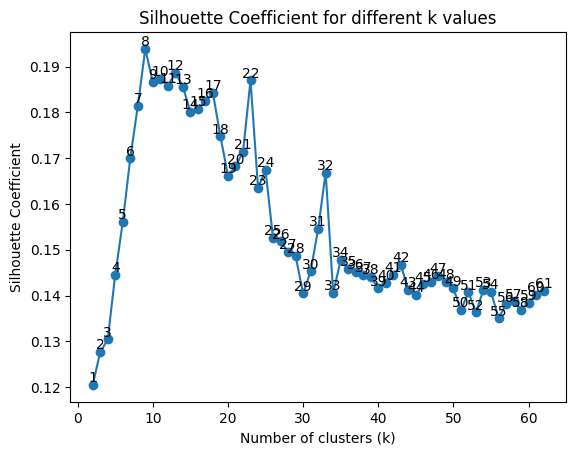

In [81]:
# Plot the Silhouette Coefficients for each k value
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for different k values')

# Add numbers on the markers
for i, score in enumerate(silhouette_scores):
    plt.text(k_values[i], score, str(i+1), ha='center', va='bottom')

plt.show()

The graph shows the k value for the peak Silhouette Coefficient score. This shows that the dataset's ideal number of clusters for meaningful and well-defined clustering is <9. The figure helps us choose a good k value for clustering. Beyond that value it will decrease the performance of the model.

**1.2. Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results.**

First, apply the K-mean clustering and check the performance using different performance metrics.

In [97]:
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.metrics import confusion_matrix

# Perform K-means clustering with the optimal k value using K-means algorithm
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features)
kmeans_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [98]:
# Calculate evaluation metrics
silhouette = silhouette_score(X, kmeans_labels)
inertia = kmeans.inertia_
completeness = completeness_score(y, kmeans_labels)
homogeneity = homogeneity_score(y, kmeans_labels)


# Replace true_labels and kmeans_labels with your data
true_labels = y
kmeans_labels = kmeans.labels_

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, kmeans_labels)

# Calculate the purity score
purity = np.sum(np.amax(conf_matrix, axis=0)) / np.sum(conf_matrix)

In [99]:
# print the results
print('K-means clustering performance:')
print('Silhouette Score:', silhouette)
print('Inertia:', inertia)
print('Completeness Score:', completeness)
print('Homogeneity Score:', homogeneity)
print('Purity Score:', purity)

K-means clustering performance:
Silhouette Score: 0.1938016692891812
Inertia: 1004381.7550767462
Completeness Score: 0.7687151413043897
Homogeneity Score: 0.7064358296338668
Purity Score: 0.7367387033398821


Now, let's try Kmean++ to check whether the performance of clustering model is improved or not.

In [110]:
# Perform K-means clustering with the optimal k value using K-means++ algorithm
kmeans_pp = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_pp.fit(X)
kmeans_pp_labels = kmeans_pp.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [111]:
# Calculate evaluation metrics
silhouette_pp = silhouette_score(X, kmeans_pp_labels)
inertia_pp = kmeans_pp.inertia_
completeness_pp = completeness_score(y, kmeans_pp_labels)
homogeneity_pp = homogeneity_score(y, kmeans_pp_labels)


from sklearn.metrics import confusion_matrix

# Replace true_labels and kmeans_labels with your data
true_labels = y
kmeans_pp_labels = kmeans_pp.labels_

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, kmeans_pp_labels)

# Calculate the purity score
purity_pp = np.sum(np.amax(conf_matrix, axis=0)) / np.sum(conf_matrix)


In [112]:
# Print the Kmean++ results
print('\nK-means++ clustering performance:')
print('Silhouette Score K++:', silhouette_pp)
print('Inertia K++:', inertia_pp)
print('Completeness Score K++:', completeness_pp)
print('Homogeneity Score K++:', homogeneity_pp)
print('Purity Score K++:', purity_pp)


K-means++ clustering performance:
Silhouette Score K++: 0.19385083362670835
Inertia K++: 4006.8148445078077
Completeness Score K++: 0.7756671996063309
Homogeneity Score K++: 0.7128960376538923
Purity Score K++: 0.7406679764243614


In [113]:
# Create a table to compare the results
results = pd.DataFrame({
    'Algorithm': ['KMeans', 'KMeans++'],
    'Silhouette Score': [silhouette, silhouette_pp],
    'Inertia': [inertia, inertia_pp],
    'Completeness Score': [completeness, completeness_pp],
    'Homogeneity Score': [homogeneity, homogeneity_pp],
    'Purity Score': [purity, purity_pp]
})

results.round(4)

,Algorithm,Silhouette Score,Inertia,Completeness Score,Homogeneity Score,Purity Score
0,KMeans,0.1938,4006.7668,0.7738,0.7112,0.7367
1,KMeans++,0.1939,4006.8148,0.7757,0.7129,0.7407


The purpose of comparing KMeans and KMeans++ is to analyse if more better initialisation strategy of KMeans++ leads to a better clustering performance when compared to KMeans.

The performance metrics used explains:
*  **Silhouette Score**: Measures the quality of clustering by computing the mean silhouette coefficient for each data point, indicating how well it fits within its cluster compared to neighboring clusters.
* **Inertia**: Measures the sum of squared distances of samples to their cluster center, serving as a measure of compactness within clusters, and it is minimized during KMeans clustering.
* **Completeness Score**: Measures the ability of the clustering algorithm to correctly assign all members of a true class to the same cluster.
* **Homogeneity Score**: Measures the ability of the clustering algorithm to group samples from the same true class into a single cluster.
* **Purity Score**: Used mainly for clustering evaluation, it measures the proportion of correctly clustered samples with the same true class in a cluster..

If we observe that the performance metrics for KMeans++ are significantly better than those for KMeans, it implies that the initialisation strategy used in KMeans++ has played a role in generating clusters that are more well-defined and accurate. On the other hand, if the scores are similar for both algorithms, it suggests that both methods produced clustering of similar quality.


### **Task 3: Repeat clustering using K-means for 50 times and report the average performance. Compare the results obtained in Q2 using K-means++ and explain the difference**

Here we will increase the repetition of Kmeans for about 50 times and check the average performance.

In [ ]:
# Define the number of repetitions
num_repetitions = 50

# Initialize lists to store performance metrics for each repetition
silhouette_50 = []
inertia_50 = []
completeness_50 = []
homogeneity_50 = []

for _ in range(num_repetitions):
    # Perform K-means clustering
    kmeans_50 = KMeans(n_clusters=optimal_k, random_state=i)
    kmeans_50.fit(X)
    kmeans_50_labels = kmeans_50.labels_

    # Calculate evaluation metrics
    silhouette = silhouette_score(X, kmeans_50_labels)
    inertia = kmeans.inertia_
    completeness = completeness_score(y, kmeans_50_labels)
    homogeneity = homogeneity_score(y, kmeans_50_labels)

    # Append scores to the lists
    silhouette_50.append(silhouette)
    inertia_50.append(inertia)
    completeness_50.append(completeness)
    homogeneity_50.append(homogeneity)

In [124]:
# Calculate the purity score

# Replace true_labels and kmeans_labels with your data
true_labels = y
kmeans_50_labels = kmeans_50.labels_

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, kmeans_50_labels)

# Calculate the purity score
purity_50 = np.sum(np.amax(conf_matrix, axis=0)) / np.sum(conf_matrix)

In [125]:
# Calculate the average performance
average_silhouette = np.mean(silhouette_50)
average_inertia = np.mean(inertia_50)
average_completeness = np.mean(completeness_50)
average_homogeneity = np.mean(homogeneity_50)
average_purity = np.mean(purity_50)

print('Average performance over', num_repetitions, 'repetitions:')
print('Average Silhouette Score:', average_silhouette)
print('Average Inertia:', average_inertia)
print('Average Completeness Score:', average_completeness)
print('Average Homogeneity Score:', average_homogeneity)
print('Purity Score K++:', average_purity)

Average performance over 50 repetitions:
Average Silhouette Score: 0.19385667000262527
Average Inertia: 4006.774110773601
Average Completeness Score: 0.7726361988733561
Average Homogeneity Score: 0.7102503983234649
Purity Score K++: 0.739358218729535


Let's compare the result with the K-mean++ results

In [126]:
# Create a table to compare the results
results = pd.DataFrame({
    'Algorithm': ['KMeans++', 'KMeans-50'],
    'Silhouette Score': [silhouette_pp, average_silhouette],
    'Inertia': [inertia_pp, average_inertia],
    'Completeness Score': [ completeness_pp, average_completeness],
    'Homogeneity Score': [homogeneity_pp, average_homogeneity],
    'Purity Score': [purity_pp, average_purity]
})

results.round(4)

,Algorithm,Silhouette Score,Inertia,Completeness Score,Homogeneity Score,Purity Score
0,KMeans++,0.1939,4006.8148,0.7757,0.7129,0.7400
1,KMeans-50,0.1939,4006.7741,0.7726,0.7103,0.7394


Since KMeans++ is only a variation of KMeans that initialises cluster centres in a smarter way to boost convergence speed and avoid suboptimal solutions, the performance metrics for the two should be very similar. However, due to random initialisation, the actual results may vary slightly. To better understand the variation in performance metrics, we ran KMeans 50 times with different random states which shows that Kmean++ gave quite closely similar but bit better result as expected.

### **Task 4: Apply DBSCAN on the dataset (digitData2.csv) and find the optimum "eps" and "min_samples" value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or differences that you have found between the two solutions.**

In [ ]:
# Import DBscan and Nearest Neighbours
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

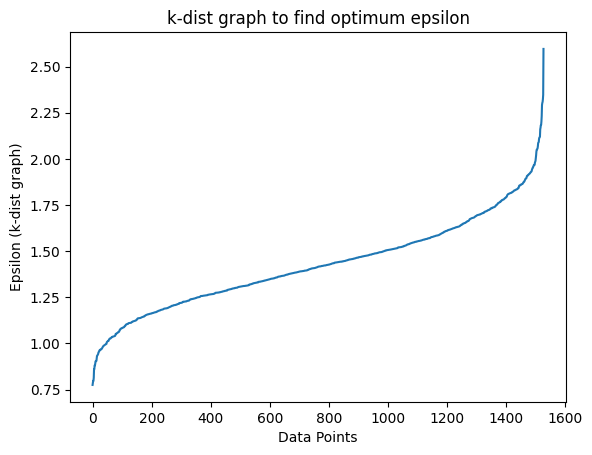

In [129]:
# Find the optimum "eps" value using the k-distance graph
k_dist_graph = NearestNeighbors(n_neighbors=optimal_k)
k_dist_graph.fit(X)
distances, _ = k_dist_graph.kneighbors(X)
distances = np.sort(distances, axis=0)[:, -1]
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Epsilon (k-dist graph)')
plt.title('k-dist graph to find optimum epsilon')
plt.show()

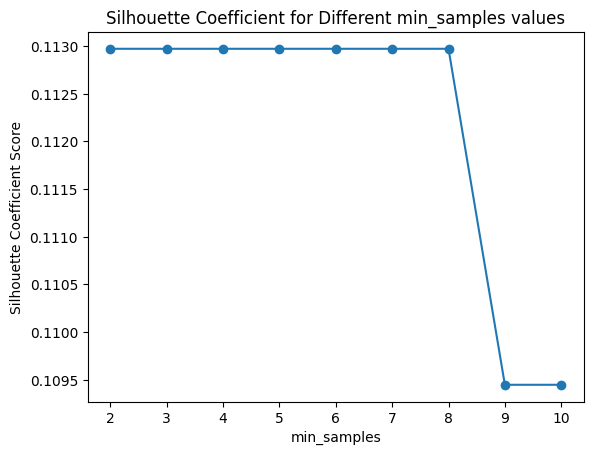

In [130]:
# Optimal eps value can be observed from the plot, set it accordingly
optimal_eps = 2.0

# Find the optimum "min_samples" value using Silhouette Coefficient
silhouette_scores_dbscan = []
min_samples_values = range(2, 11)

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X)
    silhouette_scores_dbscan.append(silhouette_score(X, dbscan_labels))

# Plot the Silhouette Coefficient scores for different min_samples values
plt.plot(min_samples_values, silhouette_scores_dbscan, marker='o')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Coefficient Score')
plt.title('Silhouette Coefficient for Different min_samples values')
plt.show()


In [131]:
# Optimal min_samples value can be observed from the plot, set it accordingly
optimal_min_samples = min_samples_values[silhouette_scores_dbscan.index(max(silhouette_scores_dbscan))]

# Apply DBSCAN with the optimal parameters
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = dbscan.fit_predict(X)

# Get the number of clusters
num_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # -1 represents noise

# Compare the number of clusters
print(f"Number of Clusters found by KMeans and KMeans++: {optimal_k}")
print(f"Number of Clusters found by DBSCAN: {num_clusters_dbscan}")

Number of Clusters found by KMeans and KMeans++: 9
Number of Clusters found by DBSCAN: 1


The number of clusters found by KMeans and KMeans++ is equal to the optimal_k value, which was obtained using the Silhouette Coefficient in Q1.1. On the other hand, DBSCAN does not require specifying the number of clusters explicitly. Instead, it automatically determines the number of clusters based on the density of data points.

The differences between the two solutions are:

* 1. Cluster Generation:
   - KMeans and KMeans++ are centroid-based algorithms that aim to partition the data into a pre-defined number of clusters, where each data point is assigned to the cluster with the nearest centroid.
   - DBSCAN, on the other hand, is a density-based algorithm that identifies dense regions as clusters and treats points outside these regions as outliers (noise).

* 2. Cluster Shape:
   - KMeans and KMeans++ typically produce clusters with convex shapes, as they optimize the sum of squared distances from each point to its assigned cluster centroid.
   - DBSCAN can discover clusters of arbitrary shapes and is not limited to convex clusters. It can identify clusters of varying densities and handle noise points effectively.

* 3. Handling Outliers:
   - KMeans and KMeans++ assign all points to clusters, even if they are far away from the cluster centers. They are sensitive to outliers, and outliers can significantly impact the cluster centroids.
   - DBSCAN identifies outliers as points not belonging to any cluster, and it does not force all points into clusters. This makes DBSCAN robust to noise and outliers.

* 4. Parameter Dependency:
   - KMeans and KMeans++ heavily depend on the initial choice of cluster centroids, and multiple runs with different initializations may lead to different final cluster assignments.
   - DBSCAN's performance is less sensitive to initial parameter settings, like "eps" and "min_samples", due to its density-based nature. The algorithm is less influenced by the initial state and often provides consistent results.

In summary, while KMeans and KMeans++ are suitable for data with well-separated and convex clusters, DBSCAN is more appropriate for data with complex shapes, varying cluster densities, and noisy points. The number of clusters is determined automatically by DBSCAN, while KMeans requires specifying the number of clusters beforehand. The choice of algorithm depends on the characteristics of the data and the desired outcomes.


# **Part 2**
Load "diabetes" datasets from SKlearn and do the PCA for n=3, and plot the data.
### **1. What is the variance (%) covered by the first 3 components? How is this percentage of variance computed?**

In [132]:
#load the dataset from sklearn
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data

In [133]:
#import PCA from sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Perform PCA for n=3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Compute the percentage of variance covered by the first 3 components
explained_variance_ratio = pca.explained_variance_ratio_
variance_covered = np.sum(explained_variance_ratio) * 100

print('Variance covered by the first 3 components: {:.2f}%'.format(variance_covered))

Variance covered by the first 3 components: 67.22%


In PCA, you add up the rates of explained variance for the first 3 components to figure out how much of the variance they explain. The explained variance ratio of a component shows how much of the dataset's variation that component can explain. It is worked out by dividing the eigenvalue of the component by the sum of all the eigenvalues. The more important a part is in recording the data's variability, the higher the ratio of explained variance.

### **2.2. Is there any correlation between these three components?**

Calculating the correlation matrix between the three PCA components yields the correlation between these components. The correlation matrix quantifies the linear association between variables. In this instance, the correlation matrix is computed between the three PCA components to determine whether or not they are linearly correlated. If the components are orthogonal (uncorrelated), the off-diagonal elements of the correlation matrix will be close to zero.

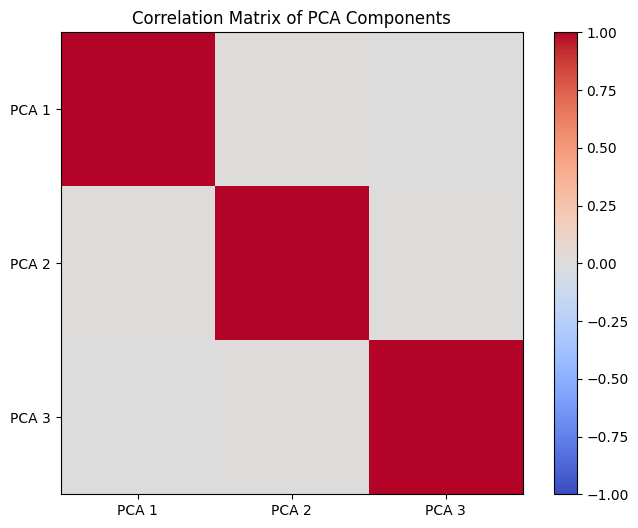

In [ ]:
# Calculate the correlation matrix of the three PCA components
correlation_matrix = np.corrcoef(X_pca.T)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(3), ['PCA 1', 'PCA 2', 'PCA 3'])
plt.yticks(range(3), ['PCA 1', 'PCA 2', 'PCA 3'])
plt.title('Correlation Matrix of PCA Components')
plt.show()

### **2.3. Apply t-SNE on the same dataset, select the first 3 components and plot them.**

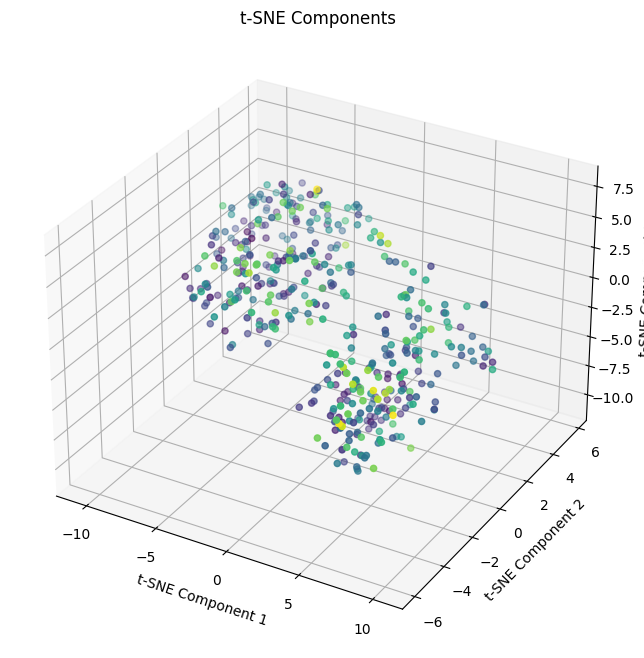

In [ ]:
# Apply t-SNE on the dataset with 3 components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=diabetes.target, cmap='viridis')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE Components')
plt.show()

The t-SNE is applied to the dataset using the first 3 components obtained from PCA. t-SNE is a non-linear dimensionality reduction technique that aims to preserve the local structures of the data in a lower-dimensional space. The t-SNE plot shows how the data points are projected into a 3D space while preserving their local similarities.

### **Q.2.4. Report the comparison between the results obtained using t-SNE and PCA**

Comparing the results of PCA and t-SNE shows how different they are in how they handle jobs like reducing the number of dimensions and showing the data. PCA is a linear method that keeps global structures and finds the most important patterns. It can be used to compress data and choose which features to use. On the other hand, t-SNE works on keeping local structures, which helps visualise clusters and find local patterns in high-dimensional data. t-SNE is often used to show how the data looks, while PCA is often used to reduce the number of features and figure out the key patterns in the data. The choice between PCA and t-SNE relies on the goals of the analysis and the data set.

